In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Manual**

In [3]:
import cv2 as cv
import os
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [4]:
img = cv.imread("/content/drive/MyDrive/face_recognition/dataset/sardor_abdirayimov/1.jpg")
# opencv -> reads images as BGR channel format and plt reads images as RGB channel

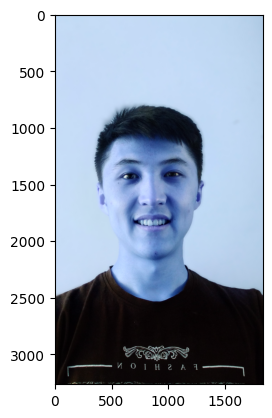

In [5]:
plt.imshow(img) # reads RGB but current image is BGR

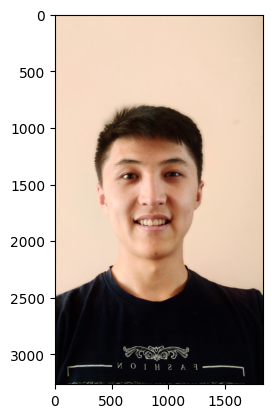

In [6]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [7]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()
results = detector.detect_faces(img)

1/1 [==============================] - 0s 151ms/step


In [8]:
results
# box: coordinates of face

[{'box': [423, 995, 812, 1109],
  'confidence': 0.9998824596405029,
  'keypoints': {'left_eye': (654, 1428),
   'right_eye': (1038, 1420),
   'nose': (858, 1644),
   'mouth_left': (686, 1826),
   'mouth_right': (1035, 1817)}}]

In [9]:
x, y, w, h = results[0]['box']

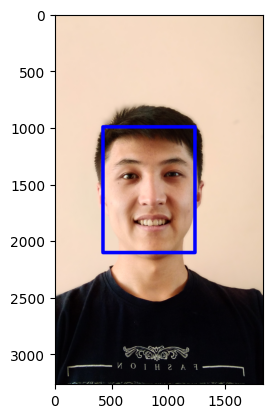

In [10]:
# rectangle
img = cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 30)
plt.imshow(img)

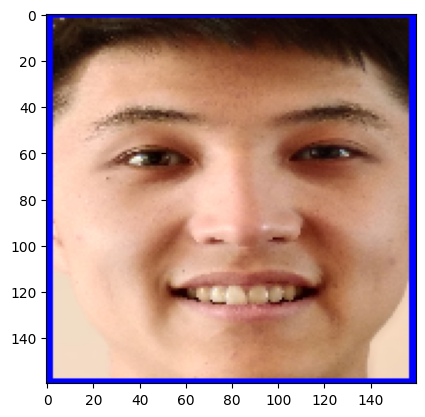

In [11]:
my_face = img[y:y+h, x:x+w]
# Facenet takes as input 160x160
my_face = cv.resize(my_face, (160, 160))
plt.imshow(my_face)

In [12]:
my_face

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]

## **Automated**

In [13]:
import numpy as np

In [14]:
"""
  __init__: 
    initializes the object with the directory

  extract_face: 
    extracts the face region from a given image file using MTCNN face detection
    algorithm. it returns the cropped face image after resizing it to a target size
  
  load_faces:
    loads all the face images from a given subdirectory and returns them as a list
  
  load_classes:
    is a higher-level function that loads all the subdirectories inside the directory 
    provided during initialization of the FACELOADING class, then it calls the load_faces 
    function for each subdirectory to load all the faces and labels them with the name 
    of the subdirectory. It returns two NumPy arrays, one containing the loaded face images 
    and the other containing the corresponding labels.
"""

class FACELOADING:
  def __init__(self, directory):
    self.directory = directory
    self.target_size = (160, 160)
    self.X = []
    self.Y = []
    self.detector = MTCNN()

  def extract_face(self, filename):
    img = cv.imread(filename)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    x, y, w, h = self.detector.detect_faces(img)[0]['box']
    x, y = abs(x), abs(y)
    face = img[y:y+h, x:x+w]
    face_arr = cv.resize(face, self.target_size)
    return face_arr

  def load_faces(self, dir):
    FACES = []
    for im_name in os.listdir(dir):
      try:
        path = dir + im_name
        single_face = self.extract_face(path)
        FACES.append(single_face)
      except Exception as e:
        pass
    return FACES

  def load_classes(self):
    for sub_dir in os.listdir(self.directory):
      path = self.directory + '/' + sub_dir + '/'
      FACES = self.load_faces(path)
      labels = [sub_dir for _ in range(len(FACES))]
      print(f"Loaded successfully: {len(labels)}")
      self.X.extend(FACES)
      self.Y.extend(labels)

    return np.asarray(self.X), np.asarray(self.Y)
    
  def plot_images(self):
    plt.figure(figsize=(18,16))
    for num, image in enumerate(self.X):
      ncols = 3
      nrows = len(self.Y) // ncols + 1
      plt.subplot(nrows, ncols, num+1)
      plt.imshow(image)
      plt.axis('off')


In [15]:
faceloading = FACELOADING("/content/drive/MyDrive/face_recognition/dataset/")
X, Y = faceloading.load_classes()

1/1 [==============================] - 1s 597ms/step


1/1 [==============================] - 0s 49ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 45ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 32ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 35ms/step
Loaded successfully: 10


In [16]:
X

array([[[[ 32,  24,  21],
         [ 31,  23,  20],
         [ 34,  25,  23],
         ...,
         [ 20,  16,  16],
         [ 21,  18,  19],
         [ 40,  34,  38]],

        [[ 57,  47,  45],
         [ 39,  31,  28],
         [ 24,  17,  11],
         ...,
         [ 20,  16,  15],
         [ 22,  16,  16],
         [ 24,  18,  18]],

        [[ 41,  31,  26],
         [ 44,  33,  29],
         [ 45,  30,  24],
         ...,
         [ 24,  18,  20],
         [ 20,  14,  16],
         [ 27,  22,  23]],

        ...,

        [[ 21,  21,  21],
         [ 30,  28,  29],
         [ 34,  30,  33],
         ...,
         [122, 121, 119],
         [122, 121, 119],
         [125, 124, 122]],

        [[ 26,  28,  30],
         [ 31,  31,  31],
         [ 34,  34,  34],
         ...,
         [123, 122, 120],
         [122, 121, 119],
         [121, 120, 118]],

        [[ 28,  30,  27],
         [ 29,  31,  30],
         [ 28,  30,  29],
         ...,
         [119, 117, 115],
        

In [17]:
Y

array(['robert_downey', 'robert_downey', 'robert_downey', 'robert_downey',
       'robert_downey', 'robert_downey', 'robert_downey', 'robert_downey',
       'robert_downey', 'robert_downey', 'sardor_abdirayimov',
       'sardor_abdirayimov', 'sardor_abdirayimov', 'sardor_abdirayimov',
       'sardor_abdirayimov', 'sardor_abdirayimov', 'sardor_abdirayimov',
       'sardor_abdirayimov', 'sardor_abdirayimov', 'sardor_abdirayimov',
       'jenna_ortega', 'jenna_ortega', 'jenna_ortega', 'jenna_ortega',
       'jenna_ortega', 'jenna_ortega', 'jenna_ortega', 'jenna_ortega',
       'jenna_ortega', 'jenna_ortega', 'taylor_swift', 'taylor_swift',
       'taylor_swift', 'taylor_swift', 'taylor_swift', 'taylor_swift',
       'taylor_swift', 'taylor_swift', 'taylor_swift', 'taylor_swift'],
      dtype='<U18')

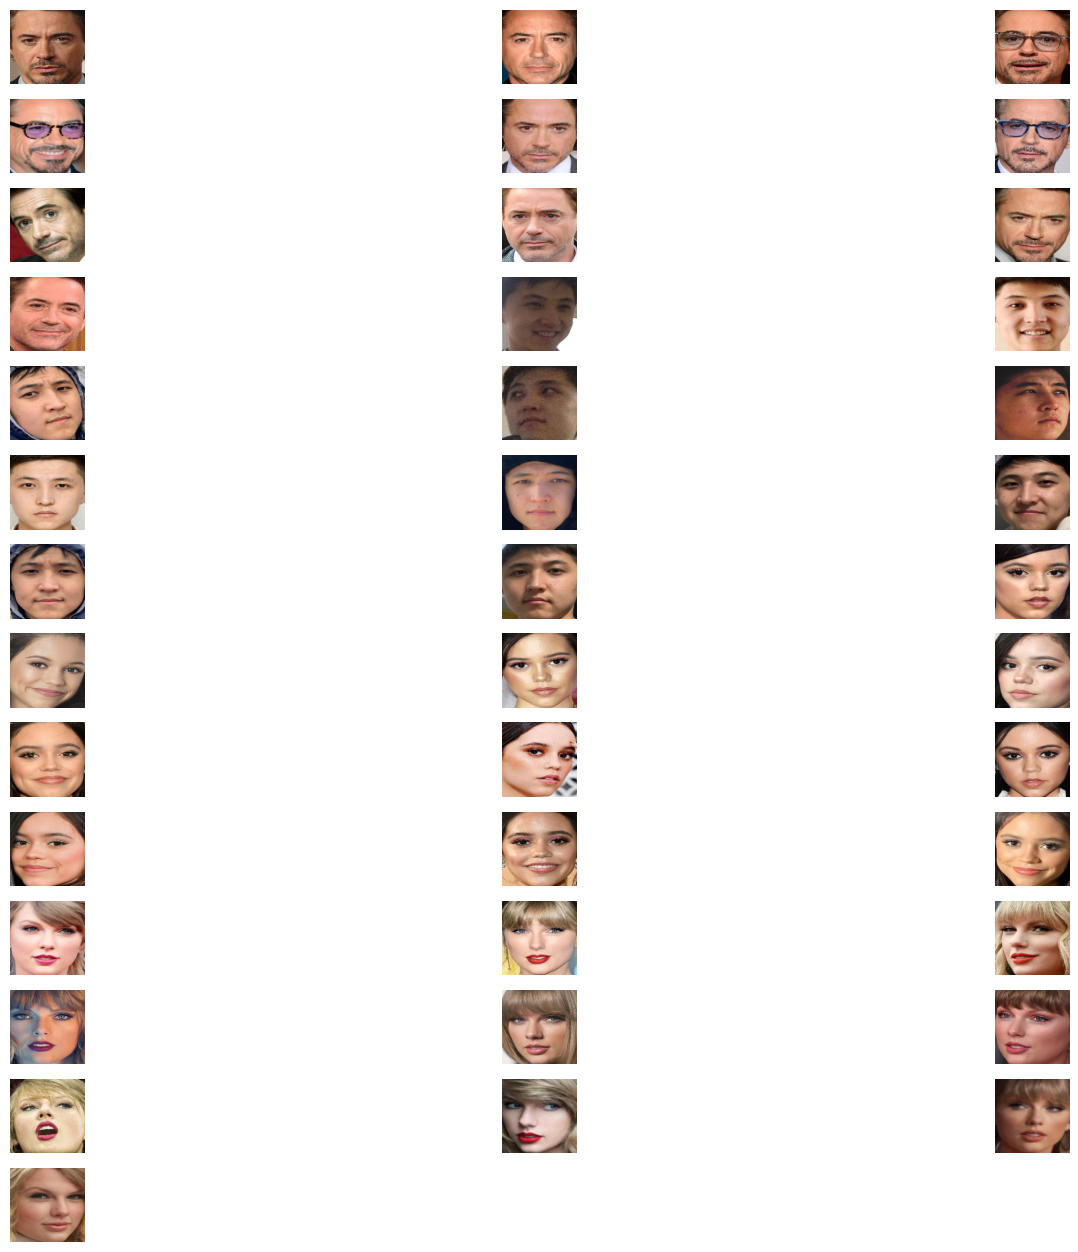

In [18]:
faceloading.plot_images()

In [19]:
!pip install keras-facenet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
from keras_facenet import FaceNet
embedder = FaceNet()

def get_embedding(face_img):
  face_img =  face_img.astype('float32') #3D
  face_img = np.expand_dims(face_img, axis=0)
  #4D 
  yhat = embedder.embeddings(face_img)
  return yhat[0] #512 image (1x1x512)

In [21]:
EMBEDDED_X = []
for img in X:
  EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 [==============================] - 0s 179ms/step


In [22]:
np.savez_compressed('faces_embeddings_done_4classes.npz', EMBEDDED_X, Y)

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [24]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [25]:
# SVM model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True, random_state=4)

In [26]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [27]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_train, ypreds_train)

1.0